# Social Networks and Text Analysis - Lab 1: Introduction to Networks

_Lecturer:_ Dr. Riccardo Di Clemente r.di-clemente@exeter.ac.uk
\
_Teaching assistant:_  Redmond, Joshua Alexander jr725@exeter.ac.uk

In [1]:
#Importing the necessary libraries for this lab:
#------------------------------------------------
import networkx as nx #---> Library for network analysis
import matplotlib.pyplot as plt #---> Library for creating plots
import collections #---> Library for operating with dictionaries
import random #---> Library for generating random numbers/distributions
import numpy as np #---> Library for efficiently operating with arrays/matrices/vectors
from pylab import rcParams #---> Library for set the attributes of the figures

#Magic functions (%) for setting up the matplotlib and increase the resolution of the plots:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Lets play with networks! 

## 1 Create the empty network

In [7]:
G=nx.Graph() #---> Create an empty undirected network (use nx.DiGraph() for the directed version)
G.add_node(1) #---> Add one node
G.add_nodes_from(range(10)) #---> Add nodes from a list or array, here we add nodes from 0 to 9

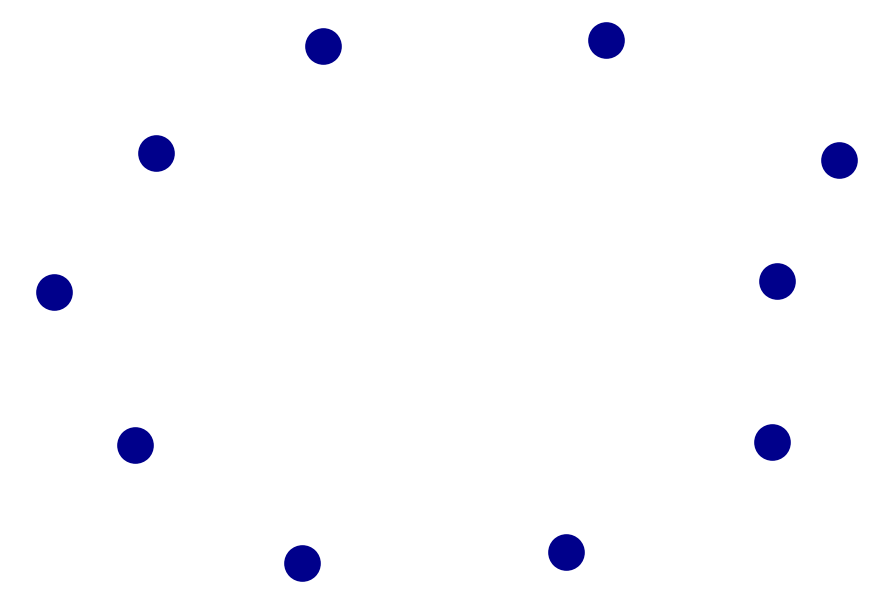

In [8]:
nx.draw(G, node_color='darkblue') #---> Plot the network which just contains nodes. This function can change 
                                    #color, layout, size, labels and other attributes of the nodes and edges.

## 2 Add the edges

Each edge is composed by source and target, and can be added to the network one by one or in a list/array. Wighted edges can be added here too.

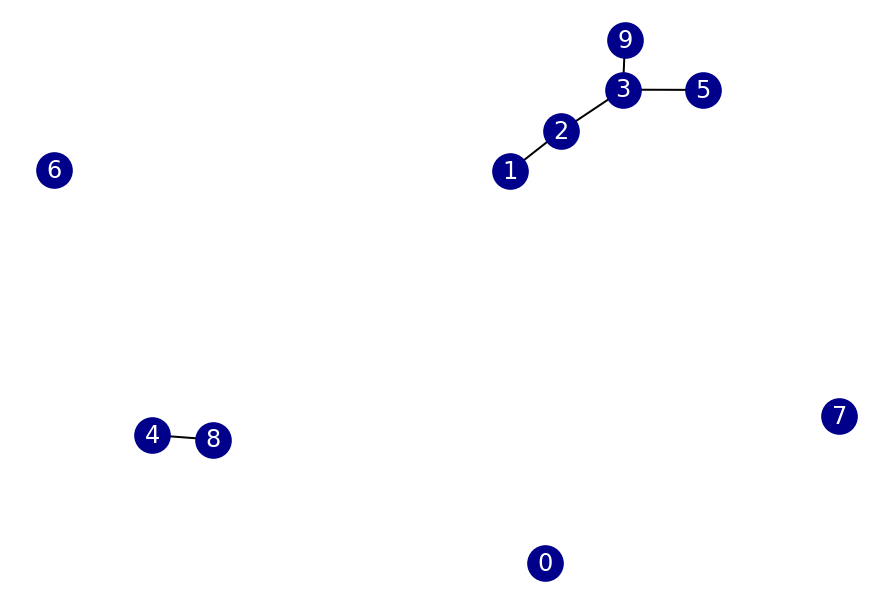

In [9]:
G.add_edge(1,2) #---> Add one edge as a tupple ()
e=[(2,3),(9,3),(8,4),(3,5)] #---> Create a list [] of tuples () being the edges
G.add_edges_from(e) #---> Add the list of edges 
nx.draw(G, with_labels=True, node_color='darkblue', font_color='white') #---> Plot the network

## 3 Check the adjacency matrix

In [10]:
print(nx.adjacency_matrix(G)) #---> Check the numpy array with the adjacency network with values different to 0
#This network is unweighted then all the next values are 1

  (0, 2)	1
  (2, 0)	1
  (2, 3)	1
  (3, 2)	1
  (3, 5)	1
  (3, 9)	1
  (4, 8)	1
  (5, 3)	1
  (8, 4)	1
  (9, 3)	1


In [21]:
#To visualize the edges and their attributes (eg weight) use the next function. 
#This object can be converted to a dict, or indexed as one, in wich the first keys are the sources, 
#the second keys are the targets and edge attributes can be other objects:
G.adj

AdjacencyView({1: {2: {}}, 0: {}, 2: {1: {}, 3: {}}, 3: {2: {}, 9: {}, 5: {}}, 4: {8: {}}, 5: {3: {}}, 6: {}, 7: {}, 8: {4: {}}, 9: {3: {}}})

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Text(0, 0.5, 'node idx')

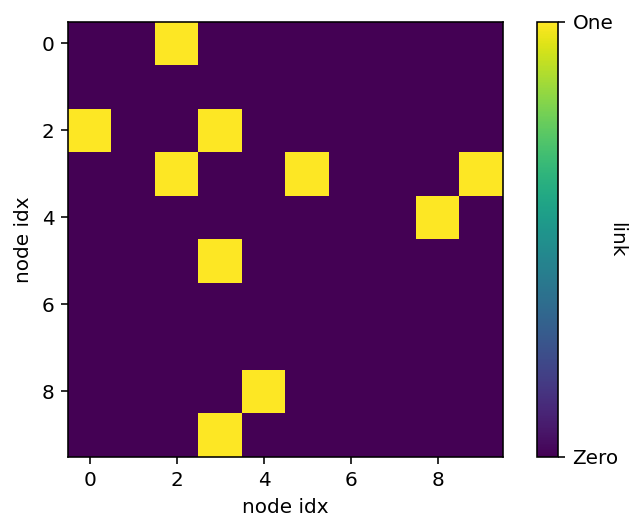

In [22]:
print(nx.to_numpy_matrix(G)) #--> visualize the entire adjacency matrix
plt.imshow(nx.to_numpy_matrix(G)) #--> This function create a heatmaps from 2-dimensional numpy arrays.
cbar = plt.colorbar() #--> set the colorbar of the heatmap
cbar.set_ticks([0,1]) #--> set the range of the color bar
cbar.ax.set_yticklabels(['Zero','One'],) #--> set the label of the number to display in the color bar

cbar.set_label('link', rotation=270) #--> set the label of the color bar and rotate it
plt.xlabel('node idx') #--> set the label of the x axis
plt.ylabel('node idx') #--> set the label of the y axis

## 4 Work with weighted networks

In [23]:
#Iterate over the edges list and add an random uniform weight from 0 to 1:
for e in G.edges():
    G[e[0]][e[1]]['weight'] = random.uniform(0, 1) #<-- Add the edge attribute of weight to each node

[[0.         0.         0.89068239 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.89068239 0.         0.         0.73108429 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.73108429 0.         0.         0.07668093
  0.         0.         0.         0.58129088]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.55871452 0.        ]
 [0.         0.         0.         0.07668093 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.55871452 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.   

Text(0, 0.5, 'node idx')

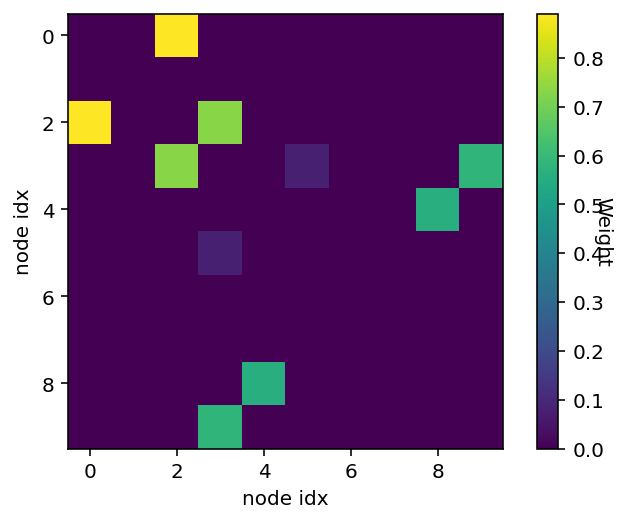

In [24]:
#Check again the adjacency matrix of the network and notice the differences:
print(nx.to_numpy_matrix(G)) #--> visualize the entire adjacency matrix
plt.imshow(nx.to_numpy_matrix(G)) #--> This function create a heatmaps from 2-dimensional numpy arrays.
cbar = plt.colorbar() #--> set the colorbar of the heatmap

cbar.set_label('Weight', rotation=270) #--> set the label of the color bar and rotate it
plt.xlabel('node idx') #--> set the label of the x axis
plt.ylabel('node idx') #--> set the label of the y axis

## 5 Network statistics

### 5.1 Degree distribution

Degree sequence [17, 16, 12, 10, 9, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
Degree frequencies Counter({2: 11, 4: 6, 3: 6, 5: 3, 6: 2, 17: 1, 16: 1, 12: 1, 10: 1, 9: 1, 1: 1})


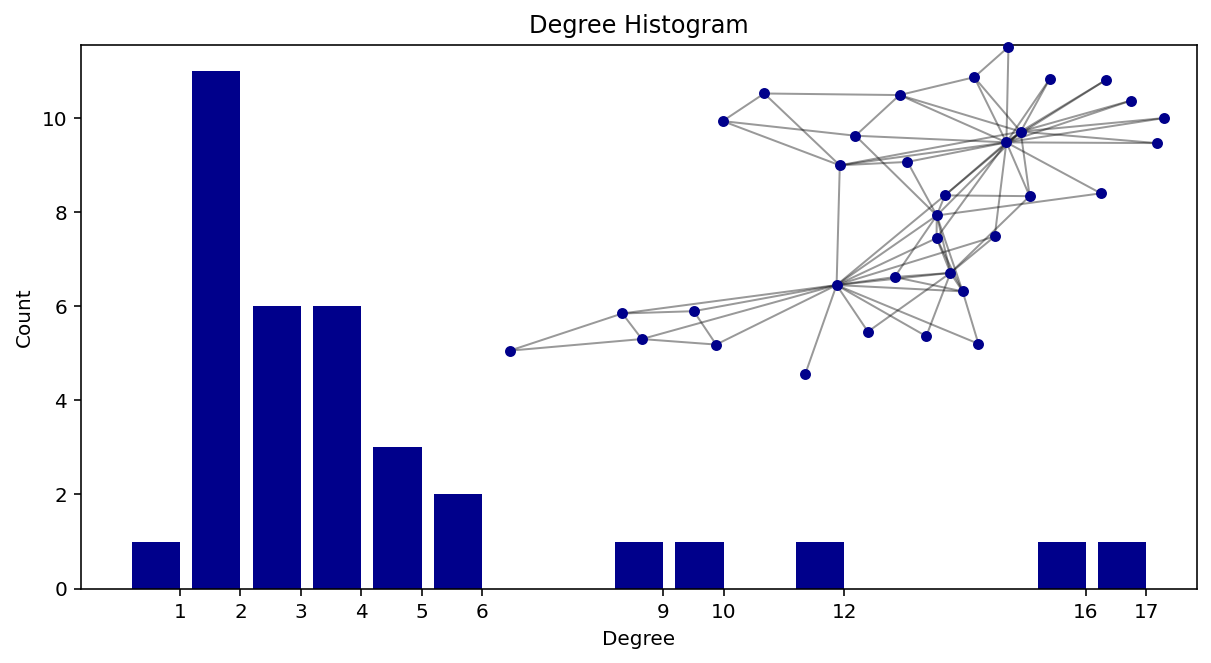

In [25]:
G =nx.karate_club_graph() #<-- G will be an existing famous network of networkx

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  #<-- Save the degree of each node 
                                                                    #and order the list from highest to lowest
print("Degree sequence", degree_sequence)

degreeCount = collections.Counter(degree_sequence) #<-- Count the frequency (number of times) of each degree
print("Degree frequencies", degreeCount)

deg, cnt = zip(*degreeCount.items()) #<-- Function that create lists of iterables, 
                                     #one for the degrees and the other one for the frquencies

rcParams['figure.figsize'] = 10, 5 #<-- Set the plot size
fig, ax = plt.subplots() #<-- Create the subplots

plt.bar(deg, cnt, width=0.80, color='darkblue') #<-- Plot a bar plot with the degrees and their frequencies

#Set plot attributes as title, x and y labels, and ticks with frequencies larger than zero
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

#Draw the network inside the barplot
plt.axes([0.4, 0.4, 0.5, 0.5])

#Select the largest connected component of the network:
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

pos = nx.spring_layout(G) #<-- Set the layout of the network
plt.axis('off') #<-- Remove the axis of the network plot
nx.draw_networkx_nodes(G, pos, node_color= 'darkblue',node_size=20) #<-- Plot the nodes
nx.draw_networkx_edges(G, pos, alpha=0.4) #<-- Plot the edges

plt.show()

In [26]:
print('Average degree', np.mean(G.degree()))
print('Connectance', nx.density(G))

Average degree 10.544117647058824
Connectance 0.13903743315508021


### 5.2 Shortest Path

[14, 32, 2, 0, 5, 16]


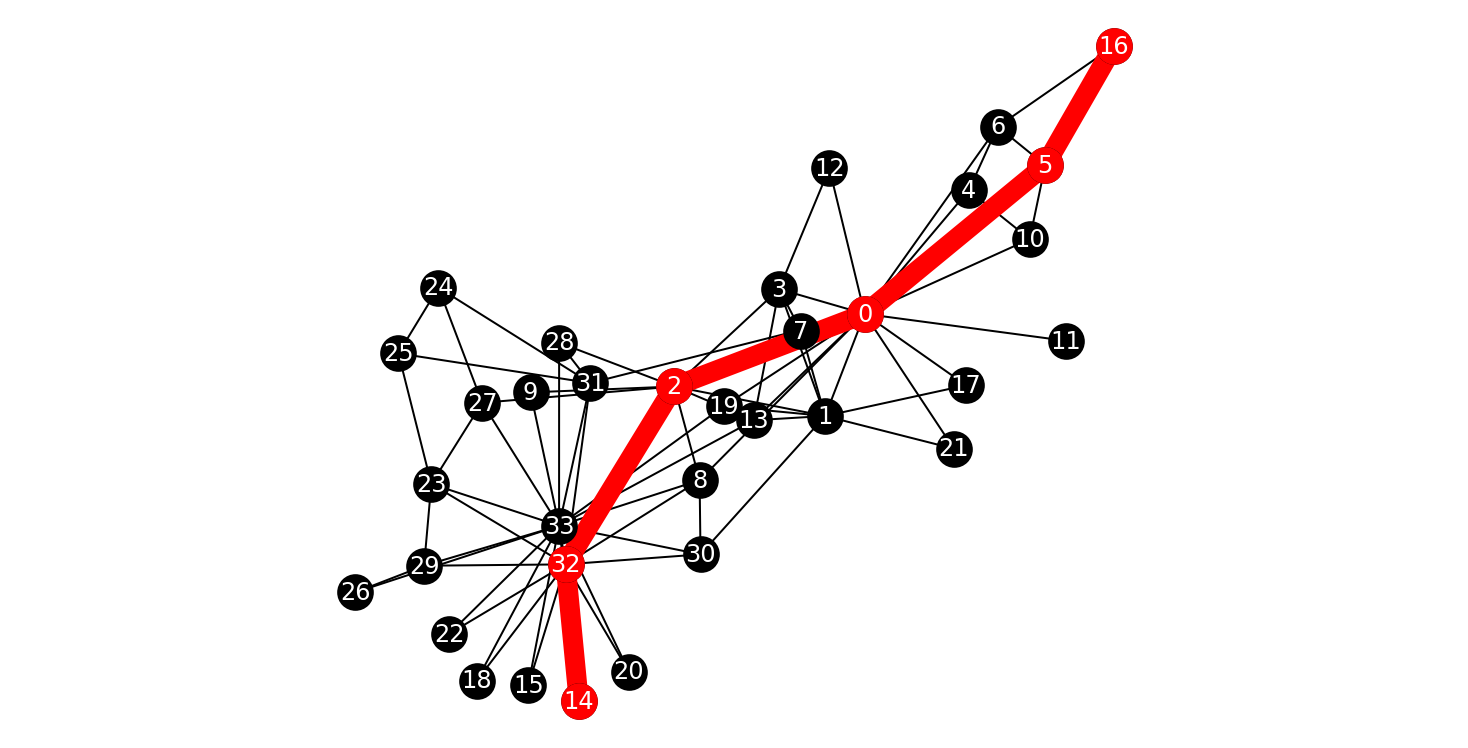

In [27]:
R = nx.karate_club_graph() #<-- R will be an existing famous network of networkx

#We will detected the shorstet path from one node to the other one
source=14  #<-- Source node
target=16  #<-- Target node

def short_path_plot(G,source,target):
    '''This function calculates the shortest path between two nodes in a network
    
    Attributes:
    G: The networkx object
    source: Name of the source node
    target: Name of the source node'''
    
    pos = nx.spring_layout(G) #<-- Set the layout of the network
    nx.draw(G,pos,node_color='k', with_labels=True, font_color='white') #<-- Plot the original network in black

    path = nx.shortest_path(G,source=14,target=16) #<-- Select the nodes in the shortest path
    print(path)
    path_edges = list(zip(path,path[1:])) #<-- Create a list of iterables with the edges of the shortest path
    nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r', label=True)  #<-- Plot the nodes
    nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=10)  #<-- Plot the edges
    plt.axis('equal')
    plt.show()
    return

#Run the created funtion
short_path_plot(R,source,target)

### 5.3 Generating the directed version

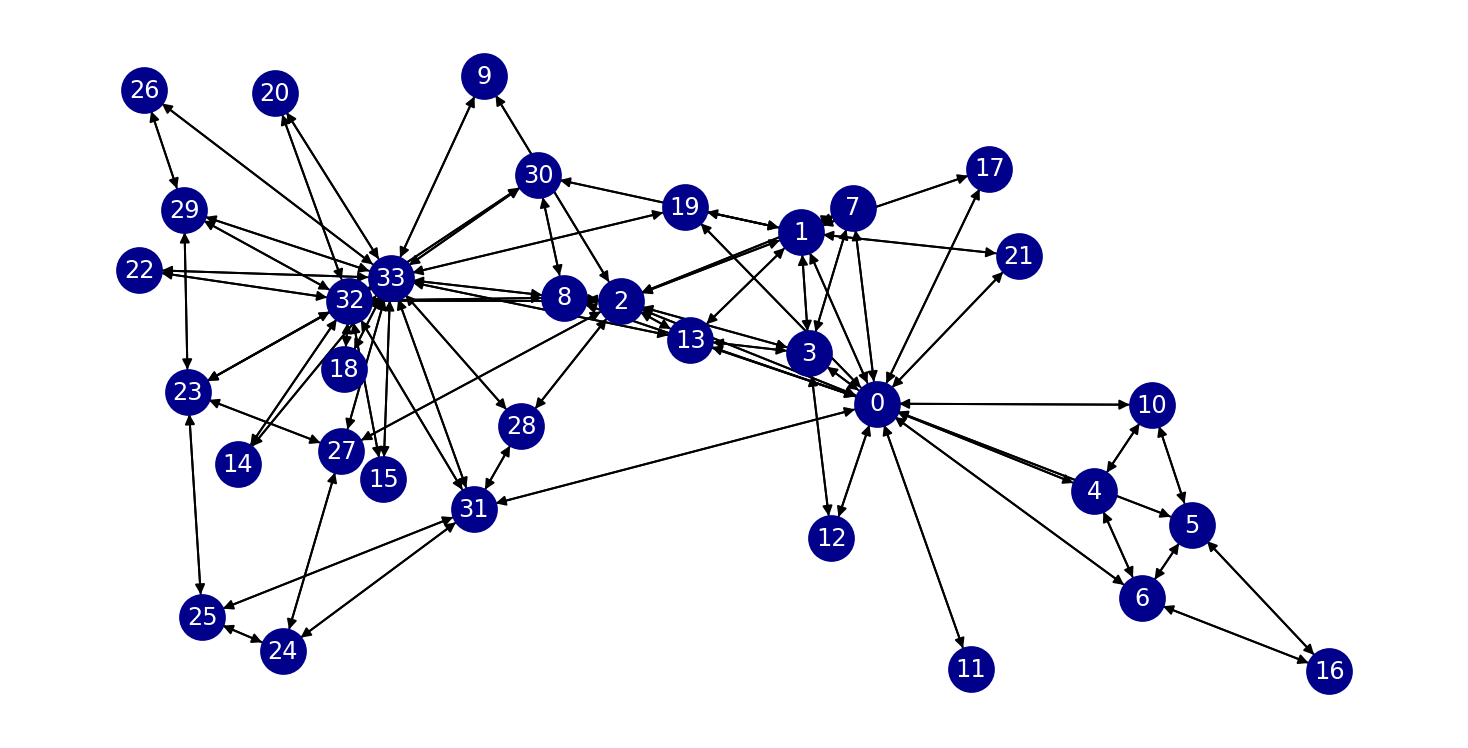

In [28]:
DiR=nx.Graph.to_directed(R) #<-- Set the network to a directed onde
pos = nx.spring_layout(DiR)
nx.draw(DiR, pos = pos, with_labels=True, node_color='darkblue', font_color='white', node_size=500) #<-- Plot the network 
                                                                                         #with some attributes


Removing some random edges and plot the network with the same layout to know the differences:

num edges removed 127


<ipython-input-29-d4a4b335fe2d>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove=random.sample(set(range(len(DiR.edges))), n_edgestoremove) #<-- Select a random sample of edges


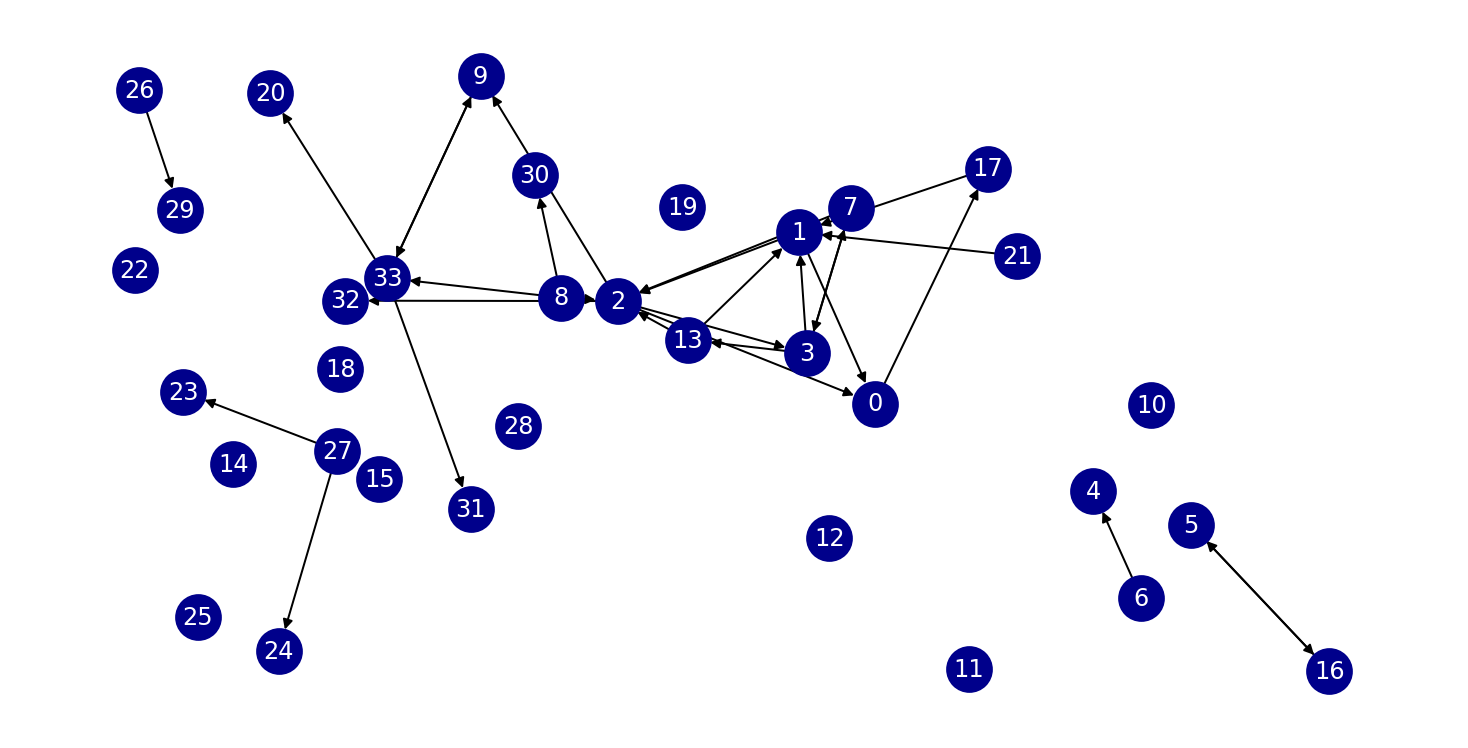

In [29]:
n_edgestoremove=random.randint(0,len(DiR.edges)) #<-- Select the number of edeges to remove
print('num edges removed '+str(n_edgestoremove))

edges_to_remove=random.sample(set(range(len(DiR.edges))), n_edgestoremove) #<-- Select a random sample of edges
                                                                           #with the number of edges to remove
DiR.remove_edges_from(np.array(DiR.edges)[edges_to_remove]) #<-- Remove the selected edges

#Plot the network with the same layout of the original network:
nx.draw(DiR, pos = pos, node_size=500, with_labels=True, node_color='darkblue', font_color='white')

### 5.4 Degree and Indegree

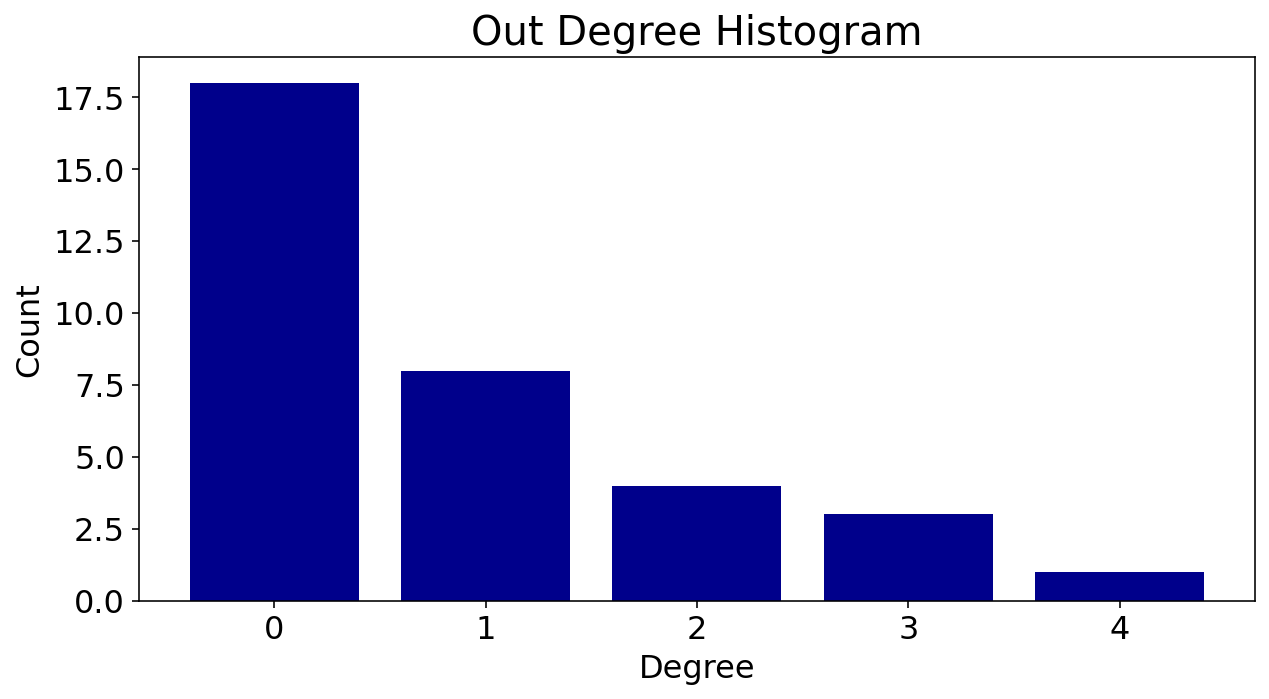

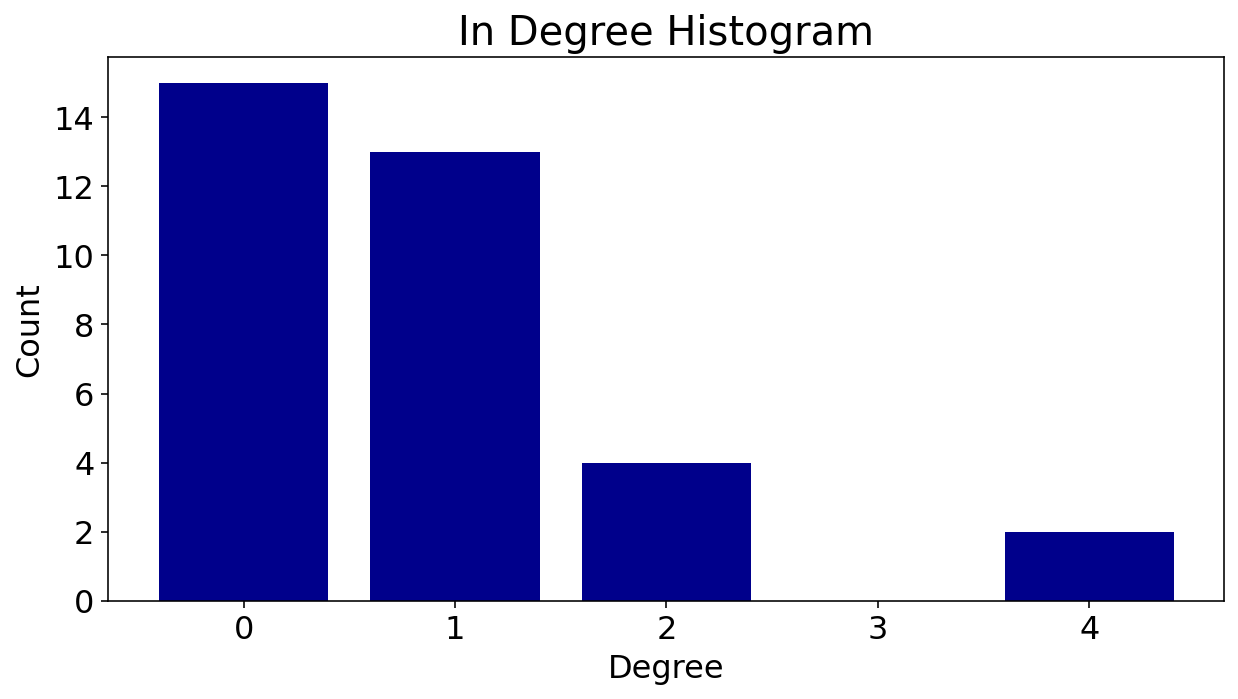

In [30]:
#Set the plot attributes for the OUT degree:
#-------------------------------------------
degree_sequence = sorted([d for n, d in DiR.out_degree()], reverse=True)  #<-- Save the degree of each node 
                                                                    #and order the list from highest to lowest
degreeCount = collections.Counter(degree_sequence) #<-- Count the frequency (number of times) of each degree
deg, cnt = zip(*degreeCount.items())#<-- Function that create lists of iterables, 
                                     #one for the degrees and the other one for the frquencies
    
plt.bar(deg, cnt, width=0.80, color='darkblue') #<-- Plot a bar plot with the degrees and their frequencies

plt.title("Out Degree Histogram", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylabel("Count", size=16)
plt.xlabel("Degree", size=16)

plt.show() #<- Show the plot created in previous lines


#Set the plot attributes for the IN degree:
#-------------------------------------------
degree_sequence = sorted([d for n, d in DiR.in_degree()], reverse=True) #<-- Save the degree of each node 
                                                                    #and order the list from highest to lowest
degreeCount = collections.Counter(degree_sequence) #<-- Count the frequency (number of times) of each degree
deg, cnt = zip(*degreeCount.items()) #<-- Function that create lists of iterables, 
                                     #one for the degrees and the other one for the frquencies
    
plt.bar(deg, cnt, width=0.80, color='darkblue') #<-- Plot a bar plot with the degrees and their frequencies

plt.title("In Degree Histogram", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylabel("Count", size=16)
plt.xlabel("Degree", size=16)
plt.show() #<- Show the plot created in previous lines